In [31]:
# import matplotlib
import matplotlib.pyplot as plt

#import random
import random
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# set random seed
random.seed(5)

* generate NON stationary time-series

In [32]:
x = np.random.exponential(1)
non_stationary = [x]
for i in range(1000):
    eps = float(np.random.normal(0, 1, 1))
    y = non_stationary[len(non_stationary)-1] + eps
    non_stationary.append(y)

* plot NON stationary series generated above

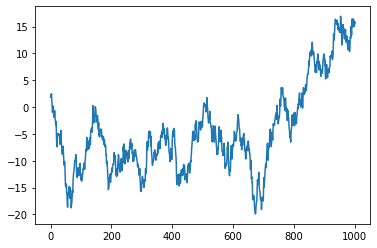

In [33]:
plt.plot(non_stationary)

* generate stationary time-series

In [39]:
stationary = np.random.exponential(size = 1000)

* plot stationary series generated above

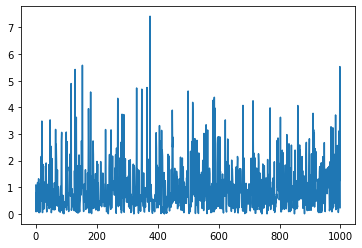

In [40]:
plt.plot(stationary)

* Create function 'ADF_Stationarity_Test' with input parameters `timeseries` and `significance_level` which: 
    * prints adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [38]:
def ADF_Stationarity_Test(timeseries, significance_level = 0.05):
    res = adfuller(timeseries)
    print('ADF Statistic: %f' % res[0])
    print('p-value: %f' % res[1])
    if res[1] > significance_level:
        print('fail to reject Ho, NOT STATIONARY')
    else:
        print('reject Ho, STATIONARY')

* Apply function 'ADF_Stationarity_Test' to find out whether timeseries generated above are stationary.

In [42]:
ADF_Stationarity_Test(non_stationary)

ADF Statistic: -1.266269
p-value: 0.644459
fail to reject Ho, NOT STATIONARY


In [41]:
ADF_Stationarity_Test(stationary)

ADF Statistic: -31.989044
p-value: 0.000000
reject Ho, STATIONARY


* Apply suitable transformation to make NON stationary time series stationary

In [59]:
transformed = [np.log(x-min(non_stationary)+1) for x in non_stationary]

* plot transformed time series

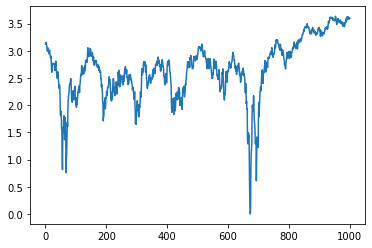

In [60]:
plt.plot(transformed)

* Apply function 'ADF_Stationarity_Test' to find out whether transformed timeseries is stationary.

In [61]:
ADF_Stationarity_Test(transformed)

ADF Statistic: -2.944787
p-value: 0.040382
reject Ho, STATIONARY
